24 - Random Walker segmentation in Python
1.  float 
2.  denoise
3.  hist_equalize
4.  markers 指派索引標記 (創建空矩陣，填入已確定)
5.  random walker 隨機分派未索引標記 (分配未確定)
6.  創建空矩陣, 再次填入索引標記



In [32]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
path = r'/content/gdrive/My Drive/Colab Notebooks/screeni_practice'
os.chdir( path )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, img_as_float, exposure
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.segmentation import random_walker

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        1.1000e+01, 1.0000e+01, 1.4000e+01, 1.3000e+01, 2.4000e+01,
        3.0000e+01, 3.7000e+01, 5.8000e+01, 6.1000e+01, 1.2800e+02,
        1.6800e+02, 1.7200e+02, 2.7000e+02, 2.5100e+02, 5.1000e+02,
        4.0800e+02, 6.5500e+02, 6.0300e+02, 1.0460e+03, 8.5500e+02,
        1.4790e+03, 1.7840e+03, 1.3940e+03, 2.5320e+03, 2.0030e+03,
        3.4760e+03, 2.6180e+03, 4.4520e+03, 3.3800e+03, 5.5410e+03,
        6.1280e+03, 4.5680e+03, 7.4770e+03, 5.46

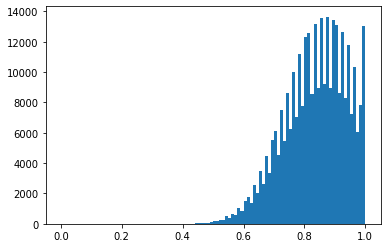

In [7]:
img = img_as_float(io.imread('images/Alloy_noisy.jpg'))

plt.hist(img.flat, bins=100, range=(0,1))

<ipython-input-17-bd1ab9cd676f>:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, **patch_kw, multichannel=False)


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 6.0000e+00, 4.80

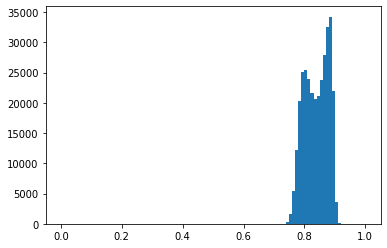

In [17]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

patch_kw = dict(patch_size=5,      # 5x5 patches
          patch_distance=6,  # 13x13 search area
          channel_axis=-1)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, **patch_kw, multichannel=False)
# plt.imshow(denoise_img)

plt.hist(denoise_img.flat, bins=100, range=(0,1))

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.200e+01, 7.800e+01, 1.800e+02, 4.100e+02, 6.630e+02, 9.740e+02,
        1.306e+03, 1.602e+03, 2.041e+03, 2.330e+03, 2.537e+03, 2.870e+03,
        3.098e+03, 3.433e+03, 3.816e+03, 3.987e+03, 4.143e+03, 4.544e+03,
        4.571e+03, 4.761e+03, 4.938e+03, 4.941e+03, 5.111e+03, 4.972e+03,
        5.207e+03, 4.998e+03, 5.032e+03, 4.926e+03, 5.021e+03, 4.945e+03,
        4.897e+03, 4.697e+03, 4.554e+03, 4.539e+03, 4.463e+03, 4.327e+03,
        4.228e+03, 4.120e+03, 4.131e+03, 4.154e+03, 4.106e+03, 3.987e+03,
        4.122e+03, 4.097e+03, 3.977e+03, 4.085e+03, 4.024e+03, 4.065e+03,
        4.097e+03, 4.226e+03, 4.341e+03, 4.517e+03, 4.841e+03, 4.893e+03,
        5.044e+03, 5.200e+03, 5.570e+0

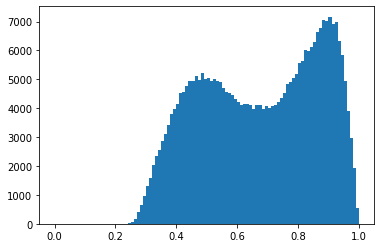

In [19]:
eq_img = exposure.equalize_adapthist(denoise_img)

plt.hist(eq_img.flat, bins=100, range=(0,1))

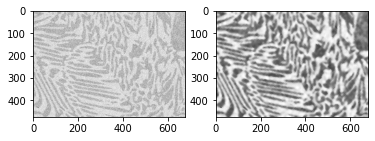

In [22]:
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(eq_img, cmap='gray')

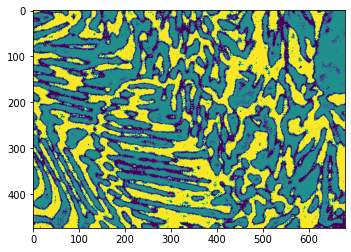

In [50]:
markers = np.zeros(img.shape, dtype=np.uint)
markers[(eq_img > 0.3) & (eq_img < 0.6)] = 1
markers[(eq_img > 0.8) & (eq_img < 0.99)] = 2
plt.imshow(markers)

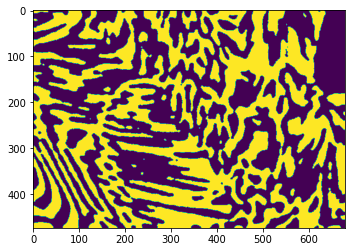

In [51]:
labels = random_walker(eq_img, markers, beta=10, mode='bf')

plt.imshow(labels)

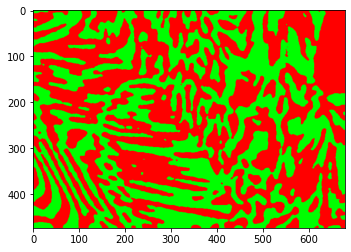

In [53]:
segm1 = (labels == 1)
segm2 = (labels == 2)

all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3))
all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)

plt.imshow(all_segments)

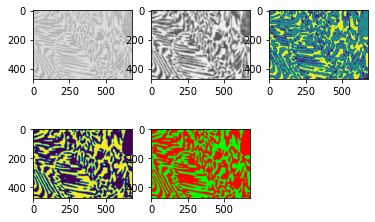

In [54]:
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(2,3,2)
plt.imshow(eq_img, cmap='gray')
plt.subplot(2,3,3)
plt.imshow(markers)
plt.subplot(2,3,4)
plt.imshow(labels)
plt.subplot(2,3,5)
plt.imshow(all_segments)